<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    int64  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 62.8 KB
None


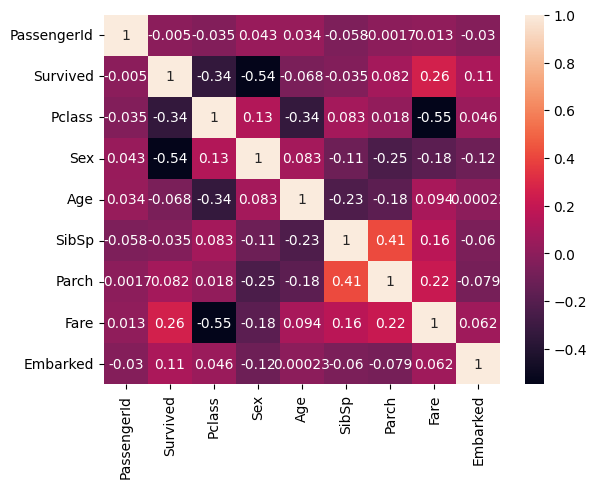

In [37]:
#EDA on Structured Data
#Titanic Data

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("titanic.csv")

#print("\n First Five Rows:")
print(df.head())

#Missing values checking
print(df.isnull().sum())

#Missing values imputation for numeric data
df['Age']=df['Age'].fillna(df['Age'].mean())

#Imputation for categorical data
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

#Dropping the cabin feature
df=df.drop(["Cabin","Name","Ticket"],axis=1)

#Missing values checking
print(df.isnull().sum())

#Categorical variable mapping
df['Sex']=df['Sex'].map({'male':1,'female':0})
df['Embarked']=df['Embarked'].map({"S":0,"C":1,"Q":2})

#Converion of age
df['Age']=df['Age'].astype('int')

#print("Dataset Info:")
print(df.info())

#Visualisation of distribution 
plt.figure(figsize=(5,5))
sns.histplot(df['Age'],bins=30)
plt.title("Age Distribution")
plt.show()

#Visualisation the survival rates
plt.figure(figsize=(5,5))
sns.countplot(x='Survived',data=df)
plt.title("Survival rates")
plt.show()

#Visualisations relations
sns.heatmap(df.corr(),annot=True)
plt.show()

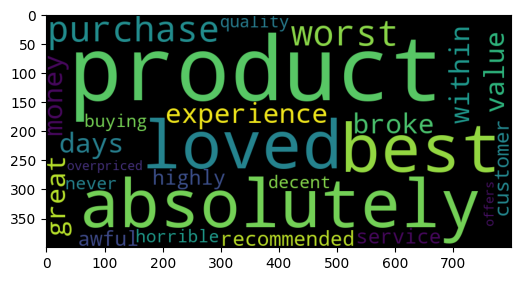

,absolutely,again,awful,best,broke,buying,customer,days,decent,ever,...,offers,overpriced,product,purchase,quality,recommended,service,value,within,worst
0,1,0,0,1,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,1,1,0,0,1,0,0,0,0,0


In [19]:
#EDA on Unstructured data (Text)
import pandas as pd
import matplotlib.pyplot as plt

import re
import string
import nltk 
from nltk.corpus import stopwords

from wordcloud import WordCloud

import sklearn
from sklearn.feature_extraction.text import CountVectorizer

stop_words=stopwords.words("english")

data = pd.DataFrame({
    'Review': [
        'I absolutely loved this product! Best purchase ever.',
        'Worst experience! The product broke within 2 days.',
        'Great value for money. Highly recommended!',
        'Awful! Customer service was horrible. Never buying again!',
        'Decent quality, but overpriced for what it offers.'
]
})
data['Label']=[1,0,1,0,1]
data.head()

def preprocess(text):
    text=text.lower()
    text=re.sub("/d+"," ",text)
    text=re.sub("/W+"," ",text)
    text=[words for words in text.split() if words not in stop_words and words not in string.punctuation]
    return " ".join(text)

data["Review"]=data['Review'].apply(preprocess)

#WordCloud Generation
all_texts=" ".join(data['Review'])
word_cloud=WordCloud(height=400,width=800,background_color="black").generate(all_texts)
plt.figure(figsize=(6,6))
plt.imshow(word_cloud)
plt.show()

#usage of word embeddings
cv=CountVectorizer()
X=cv.fit_transform(data['Review'])
#Vectorized dataframe
vectorized_df=pd.DataFrame(X.toarray(),columns=cv.get_feature_names_out())
vectorized_df.head()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..150.061].


Mean of the array: 128.2029779185361
Std of the array: 70.16290235256093
Min of the array: 0


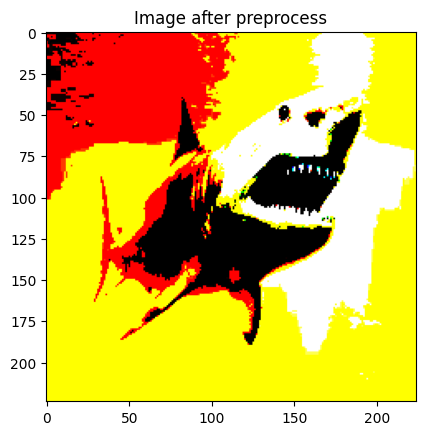

In [27]:
#EDA on unstructured image data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.applications.vgg16 import preprocess_input
import cv2

img="shark.jpg"
img=cv2.imread(img)
img_resized=cv2.resize(img,(224,224))
img_rgb=cv2.cvtColor(img_resized,cv2.COLOR_BGR2RGB)
img_preprocess=preprocess_input(img_rgb)
img_array=np.array(img)

print(f"Mean of the array: {img_array.mean()}")
print(f"Std of the array: {img_array.std()}")
print(f"Min of the array: {img_array.min()}")

plt.imshow(img_preprocess)
plt.title("Image after preprocess")
plt.show()